# Postwork 3

En este Postwork vamos a explorar las distribuciones de las variables categóricas de nuestro dataset. En el postwork pasado exploramos las variables numéricas y ya deberías de tener una idea general bastante buena de cómo están organizadas. Ahora es momento de hacer análisis de variables categóricas y análisis multivariable. Realiza los siguientes pasos si tiene sentido aplicarlos a tu conjunto de datos:

- Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.

- Identifica todas las variables categóricas en tu dataset.

- Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.

- Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?

- Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.

- Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'dark')

In [2]:
data = pd.read_csv("Marvel Movies.csv")
data.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


Las variables categóricas de este conjunto de datos son:

- **ID** que establece el estado de la identidad del personaje. 

In [3]:
data['ID'].unique()

array(['Secret Identity', 'Public Identity', 'No Dual Identity',
       'Known to Authorities Identity', nan], dtype=object)

In [4]:
id_counts = data['ID'].value_counts()

id_counts

Secret Identity                  6275
Public Identity                  4528
No Dual Identity                 1788
Known to Authorities Identity      15
Name: ID, dtype: int64

Text(0, 0.5, 'Número de personajes')

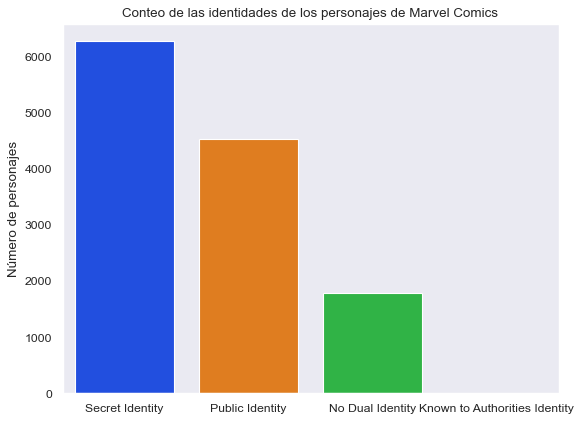

In [5]:
fig = plt.figure(figsize=(8,6), dpi = 80)

ax = sns.barplot(x = id_counts.index, y = id_counts, palette= 'bright')
ax.set_title('Conteo de las identidades de los personajes de Marvel Comics')
ax.set_ylabel('Número de personajes')

In [6]:
data['ALIGN'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan],
      dtype=object)

In [7]:
align_counts = data['ALIGN'].value_counts()

percentage_align = align_counts * 100 / align_counts.sum()


Text(0, 0.5, 'Porcentaje de personajes')

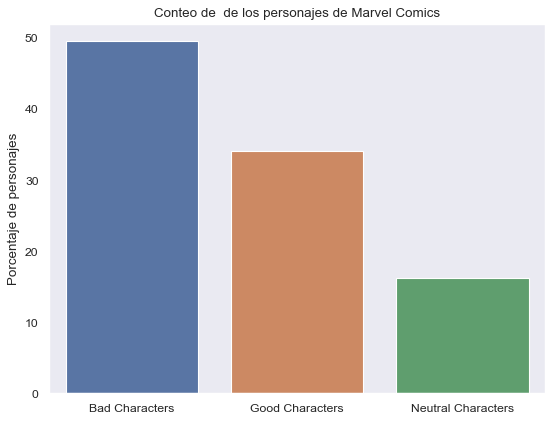

In [8]:
fig = plt.figure(figsize=(8,6), dpi = 80)

ax = sns.barplot(x = percentage_align.index, y = percentage_align)
ax.set_title('Conteo de  de los personajes de Marvel Comics')
ax.set_ylabel('Porcentaje de personajes')

In [9]:
data['EYE'].unique()

array(['Hazel Eyes', 'Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Grey Eyes',
       'Yellow Eyes', 'Gold Eyes', 'Red Eyes', 'Black Eyeballs',
       'Amber Eyes', 'Variable Eyes', nan, 'Black Eyes', 'White Eyes',
       'Orange Eyes', 'Silver Eyes', 'Purple Eyes', 'Pink Eyes',
       'One Eye', 'Violet Eyes', 'Multiple Eyes', 'Magenta Eyes',
       'Yellow Eyeballs', 'No Eyes', 'Compound Eyes'], dtype=object)

Text(0, 0.5, 'Color de ojos de los personajes')

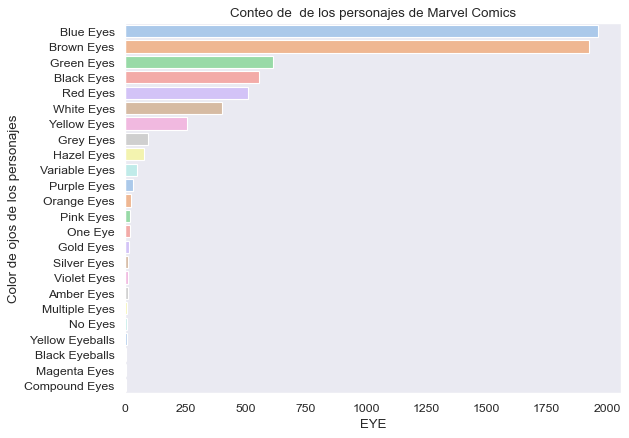

In [10]:
eye_colors = data['EYE'].value_counts()

fig = plt.figure(figsize=(8,6), dpi = 80)

ax = sns.barplot(y = eye_colors.index, x = eye_colors, palette='pastel')
ax.set_title('Conteo de  de los personajes de Marvel Comics')
ax.set_ylabel('Color de ojos de los personajes')

In [11]:
data['HAIR'].unique()

array(['Brown Hair', 'White Hair', 'Black Hair', 'Blond Hair', 'No Hair',
       'Blue Hair', 'Red Hair', 'Bald', 'Auburn Hair', 'Grey Hair',
       'Silver Hair', 'Purple Hair', 'Strawberry Blond Hair',
       'Green Hair', 'Reddish Blond Hair', 'Gold Hair', nan,
       'Orange Hair', 'Pink Hair', 'Variable Hair', 'Yellow Hair',
       'Light Brown Hair', 'Magenta Hair', 'Bronze Hair', 'Dyed Hair',
       'Orange-brown Hair'], dtype=object)

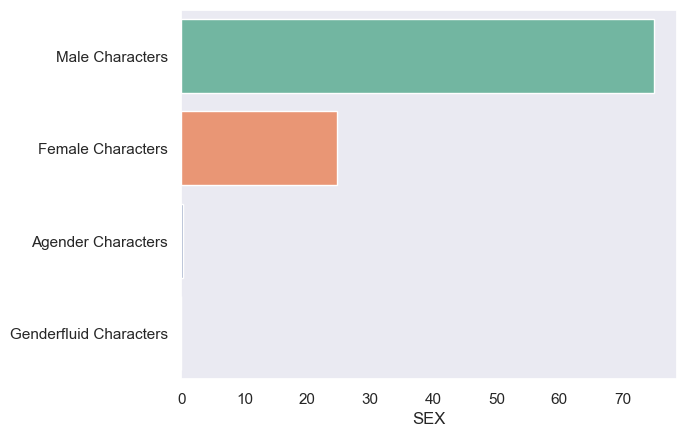

In [12]:
data['SEX'].unique()

sex_count = data['SEX'].value_counts()

sex_count_pct = sex_count * 100 / sex_count.sum()

fig = plt.plot(figsize = (8,6), dapi = 80)

ax = sns.barplot(y = sex_count_pct.index, x = sex_count_pct, palette = 'Set2')

In [13]:
data['GSM'].unique()

array([nan, 'Bisexual Characters', 'Transvestites',
       'Homosexual Characters', 'Pansexual Characters',
       'Transgender Characters', 'Genderfluid Characters'], dtype=object)

In [14]:
data['ALIVE'].unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

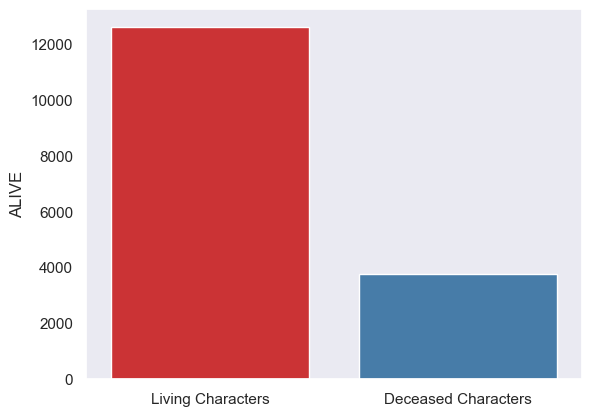

In [32]:
alive_count = data['ALIVE'].value_counts()

fig = plt.plot(figsize = (8,6), dapi = 80)

ax = sns.barplot(x = alive_count.index, y = alive_count, palette = 'Set1')


In [43]:
data['Year'].max()

data['Year'].min()


1939.0

In [15]:
pd.contingency(data['ID'], data['ALIVE'])

ALIVE,Deceased Characters,Living Characters
ID,,
Known to Authorities Identity,1,14
No Dual Identity,443,1345
Public Identity,1044,3484
Secret Identity,1628,4647


In [45]:
contingency = pd.crosstab(data['ID'], [data['ALIVE'], data['SEX']], margins = True, margins_name= 'Total')
contingency

ALIVE                         Deceased Characters                    \
SEX                            Agender Characters Female Characters   
ID                                                                    
Known to Authorities Identity                   0                 1   
No Dual Identity                                1               114   
Public Identity                                 2               185   
Secret Identity                                 1               330   
Total                                           4               630   

ALIVE                                          Living Characters  \
SEX                           Male Characters Agender Characters   
ID                                                                 
Known to Authorities Identity               0                  1   
No Dual Identity                          318                 10   
Public Identity                           840                  3   
Secret Identity                          1256                 13   
Total                                    2414                 27   

ALIVE                                                                   \
SEX                           Female Characters Genderfluid Characters   
ID                                                                       
Known to Authorities Identity                 4                      0   
No Dual Identity                            372                      1   
Public Identity                             866                      0   
Secret Identity                            1175                      1   
Total                                      2417                      2   

ALIVE                                          Total  
SEX                           Male Characters         
ID                                                    
Known to Authorities Identity               9     15  
No Dual Identity                          928   1744  
Public Identity                          2527   4423  
Secret Identity                          3250   6026  
Total                                    6714  12208

In [46]:
contingency_2 = pd.crosstab(data['ID'], [data['ALIVE'], data['SEX'],data['ALIGN']], margins = True, margins_name= 'Total')

contingency_2


ALIVE                         Deceased Characters                     \
SEX                            Agender Characters                      
ALIGN                              Bad Characters Neutral Characters   
ID                                                                     
Known to Authorities Identity                   0                  0   
No Dual Identity                                0                  1   
Public Identity                                 1                  1   
Secret Identity                                 1                  0   
Total                                           2                  2   

ALIVE                                                            \
SEX                           Female Characters                   
ALIGN                            Bad Characters Good Characters   
ID                                                                
Known to Authorities Identity                 1               0   
No Dual Identity                             12              47   
Public Identity                              37              71   
Secret Identity                             155              89   
Total                                       205             207   

ALIVE                                                             \
SEX                                              Male Characters   
ALIGN                         Neutral Characters  Bad Characters   
ID                                                                 
Known to Authorities Identity                  0               0   
No Dual Identity                              34             138   
Public Identity                               50             445   
Secret Identity                               62             790   
Total                                        146            1373   

ALIVE                                                             \
SEX                                                                
ALIGN                         Good Characters Neutral Characters   
ID                                                                 
Known to Authorities Identity               0                  0   
No Dual Identity                           83                 55   
Public Identity                           182                120   
Secret Identity                           243                135   
Total                                     508                310   

ALIVE                          Living Characters                  \
SEX                           Agender Characters                   
ALIGN                             Bad Characters Good Characters   
ID                                                                 
Known to Authorities Identity                  0               0   
No Dual Identity                               6               3   
Public Identity                                2               1   
Secret Identity                                8               2   
Total                                         16               6   

ALIVE                                                               \
SEX                                              Female Characters   
ALIGN                         Neutral Characters    Bad Characters   
ID                                                                   
Known to Authorities Identity                  1                 0   
No Dual Identity                               1                42   
Public Identity                                0               102   
Secret Identity                                3               419   
Total                                          5               563   

ALIVE                                                             \
SEX                                                                
ALIGN                         Good Characters Neutral Characters   
ID                                                                 
Known

In [17]:
data[(data['ID'] == 'Known to Authorities Identity') & (data['ALIVE'] == 'Deceased Characters')]

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
2137,Leper Queen (Earth-616),Known to Authorities Identity,Bad Characters,Brown Eyes,Bald,Female Characters,NaN,Deceased Characters,17.0,6-Jan,2006.0
